### Load prediction (3d array)

In [18]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.animation as animation
plt.rcParams["animation.html"] = "html5"
from IPython.display import HTML

### take one batch out and convert to ppm

In [5]:
data_path = "../../saves/"
file_name = "pred_0000.npz"
pred= np.load(data_path+file_name, 'r')

img = pred['arr_0'].squeeze()
print(img.shape)
num_frame = img.shape[0]
#flatten the batch dimension
h, w = img.shape[2], img.shape[3]

img_b0 = np.reshape(img[:,0,:,:], (-1, h, w,1))
print('reshaped', img_b0.shape)
np.savez(data_path+"seq2seq/"+file_name,img_b0)
# run manta to convert to ppm

(5, 5, 64, 64)
('reshaped', (5, 64, 64, 1))


### visualization of predictions

<IPython.core.display.Javascript object>


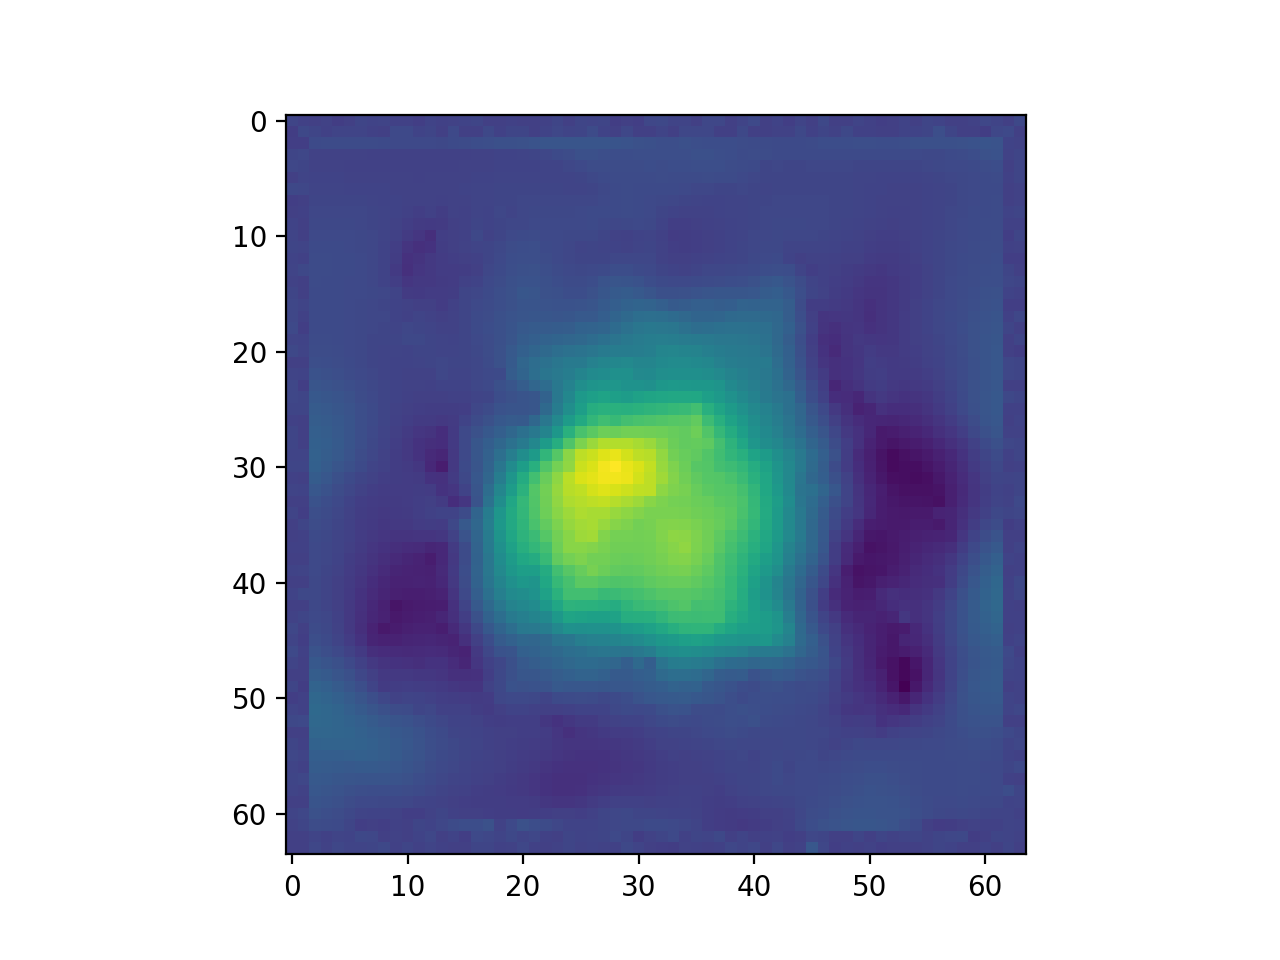

In [26]:
datetime="05-24-18-17-08-17"
dir_path ="../../saves/"+datetime+"/"

sim_len = 100
test_sim_num = 4
T =25
N = (sim_len-T) * test_sim_num


fig = plt.figure()
ims = []
for idx in range(N):
    sim_idx = idx / (sim_len-T)
    sim_idx += 1000 #start from 1000
    sim_id = str(sim_idx).zfill(4)
    step_idx = idx %(sim_len-T)
    step_id = str(step_idx).zfill(4)
     
    fname = dir_path+"pred_low_s"+sim_id+"_t"+step_id+".npz"
    img = np.load(fname)
    dat_true=img['arr_0'].squeeze()
    img_dat = dat_true[19,:,:]
    im = plt.imshow(img_dat, animated=True)
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True)

### compare pressure field


<IPython.core.display.Javascript object>


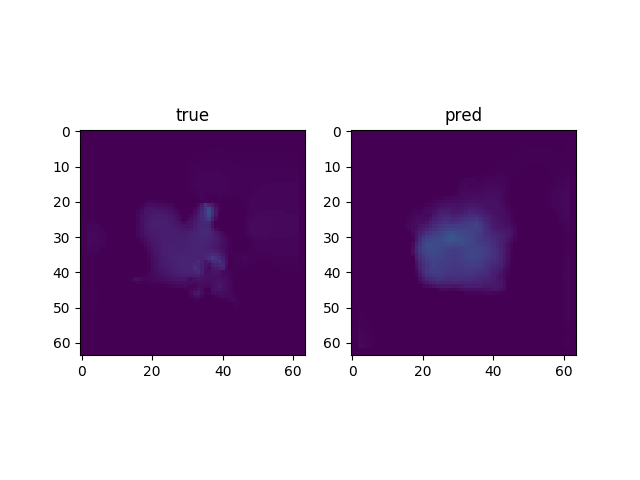

In [16]:
#https://matplotlib.org/examples/animation/animate_decay.html
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

datetime="05-25-18-23-10-32"
sim_id = str(1000).zfill(4)
# data_path ="../../tensorflow/test_data/"
dir_path ="../../saves/"+datetime+"/"


fig, (ax1, ax2) = plt.subplots(1,2)

im_true = ax1.imshow(np.random.rand(64,64), animated=True)
im_pred = ax2.imshow(np.random.rand(64,64), animated=True)
ax1.set_title("true")
ax2.set_title("pred")

sim_len = 100
test_sim_num = 4
T =25
N = (sim_len-T) * test_sim_num


idx =0
def updatefig(*args):
    global idx
    sim_idx = idx / (sim_len-T)
    sim_idx += 1000 #start from 1000
    sim_id = str(sim_idx).zfill(4)
    step_idx = idx %(sim_len-T)
    step_id = str(step_idx).zfill(4)
    
    
    idx +=1
    img_id = str(idx).zfill(4)
    #true
    fname = dir_path+"true_s"+sim_id+"_t"+img_id+".npz"
    img = np.load(fname)
    dat_true=img['arr_0'].squeeze()
    
    # normalize back
    dat_true = (dat_true*0.0088)+0.00015
    dat_true = dat_true[0,:,:]

    #pred
    fname = dir_path+"pred_low_s"+sim_id+"_t"+img_id+".npz"
    img = np.load(fname)
    dat_pred=img['arr_0'].squeeze()
    
    # normalize back
    dat_pred = (dat_pred*0.0088)+0.00015
    dat_pred = dat_pred[0,:,:]
    
    # update the data
    im_true.set_array(dat_true)
    im_pred.set_array(dat_pred)
    return im_true, im_pred

    
ani = animation.FuncAnimation(fig, updatefig, frames=300,interval=50, blit=True, repeat=True)
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)

# ani.save(dir_path+'comparison.mp4', writer=writer)

plt.show()

### Inspect the loss

In [21]:
import torch
file_name ="losses.pth"
losses = torch.load(dir_path+file_name)
train_ls, valid_ls, test_ls = losses

100


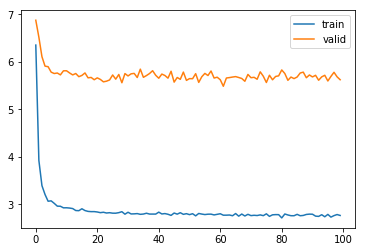

In [32]:
%matplotlib inline
plt.plot(train_ls)
plt.plot(valid_ls)
# plt.plot(test_ls)
plt.legend(['train', 'valid'])